# Marketing Campaign Analysis

## Background

PT. Nol Bir bergerak di bidang retail menjual
berbagai produk seperti wine, buah-buahan,
daging, ikan, makanan manis, dan juga emas.
Untuk melakukan pembelian, customer dapat
langsung ke store, melalui website, maupun
catalog.

Perusahaan ini telah melakukan marketing
campaign untuk meningkatkan penjualan
sebanyak 5 kali.

## Problem

Tingkat respon customer terhadap campaign
yang telah dilakukan terlalu rendah.

## Goals

Membuat marketing campaign yang tepat sasaran (response rate
dan profit tinggi).

## Objective
Membuat model machine learning yang mampu memprediksi
apakah seorang customer akan merespon campaign
selanjutnya atau tidak.

# Stage 1 (Data Preparation)

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import RandomOverSampler
import collections
from collections import Counter

from warnings import filterwarnings
filterwarnings('ignore')

## Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [ ]:
df = pd.read_csv("marketing_campaign.csv",sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Stage 2 (Exploratory Data Analysis)

## Descriptive Statistic

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- DataSets Memiliki 29 kolom dan 2240 baris data
- DataSets Terdapat 3 jenis tipe data yaitu : int64,object,float64
- DataSets kolom income memiliki 2216 nilai non-null, dan 24 nilai null 





### Cek Duplikat dan Null

In [ ]:
# Cek data duplikat
df[df.duplicated(keep=False) == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Tidak menemukan data duplikat

In [ ]:
# Cek data null
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# Banyaknya data null
(df.isna().sum()/df.shape[0]*100)['Income']

1.0714285714285714

terdapat 1.07% data yang hilang atau null

In [ ]:
# Memisahkan data numerical dan categorical
nums=[ 'Income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Kidhome',
       'Teenhome']
     
cats =['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']

### Numerik

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0
NumWebPurchases,2240.0,4.084821,2.778714,0.0,2.00,4.0,6.00,27.0


### Categorical

In [ ]:
df[cats].describe()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df[cats].describe(include='object')

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [ ]:
for column in cats:
    print(df[column].value_counts())
    print("-" * 40)

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
----------------------------------------
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
----------------------------------------
0    2077
1     163
Name: AcceptedCmp3, dtype: int64
----------------------------------------
0    2073
1     167
Name: AcceptedCmp4, dtype: int64
----------------------------------------
0    2077
1     163
Name: AcceptedCmp5, dtype: int64
----------------------------------------
0    2096
1     144
Name: AcceptedCmp1, dtype: int64
----------------------------------------
0    2210
1      30
Name: AcceptedCmp2, dtype: int64
----------------------------------------
0    2219
1      21
Name: Complain, dtype: int64
----------------------------------------
0    1906
1     334
Name: Response, dtype: int64
---------------------

1.   Pada kolom Education, "2n Cycle" dan "Master" memliki arti yang sama.
2.   Pada kolom Marital Status, "Single" dan "Alone" memiliki arti yang sama.
3.   Pada kolom Marital Status, ada beberapa value yang tidak jelas apa yang dimaksud yaitu  "Absurd" dan "YOLO".
4. Kolom yang akan dijadikan target (Response) tidak balance





## Univariate Analysis

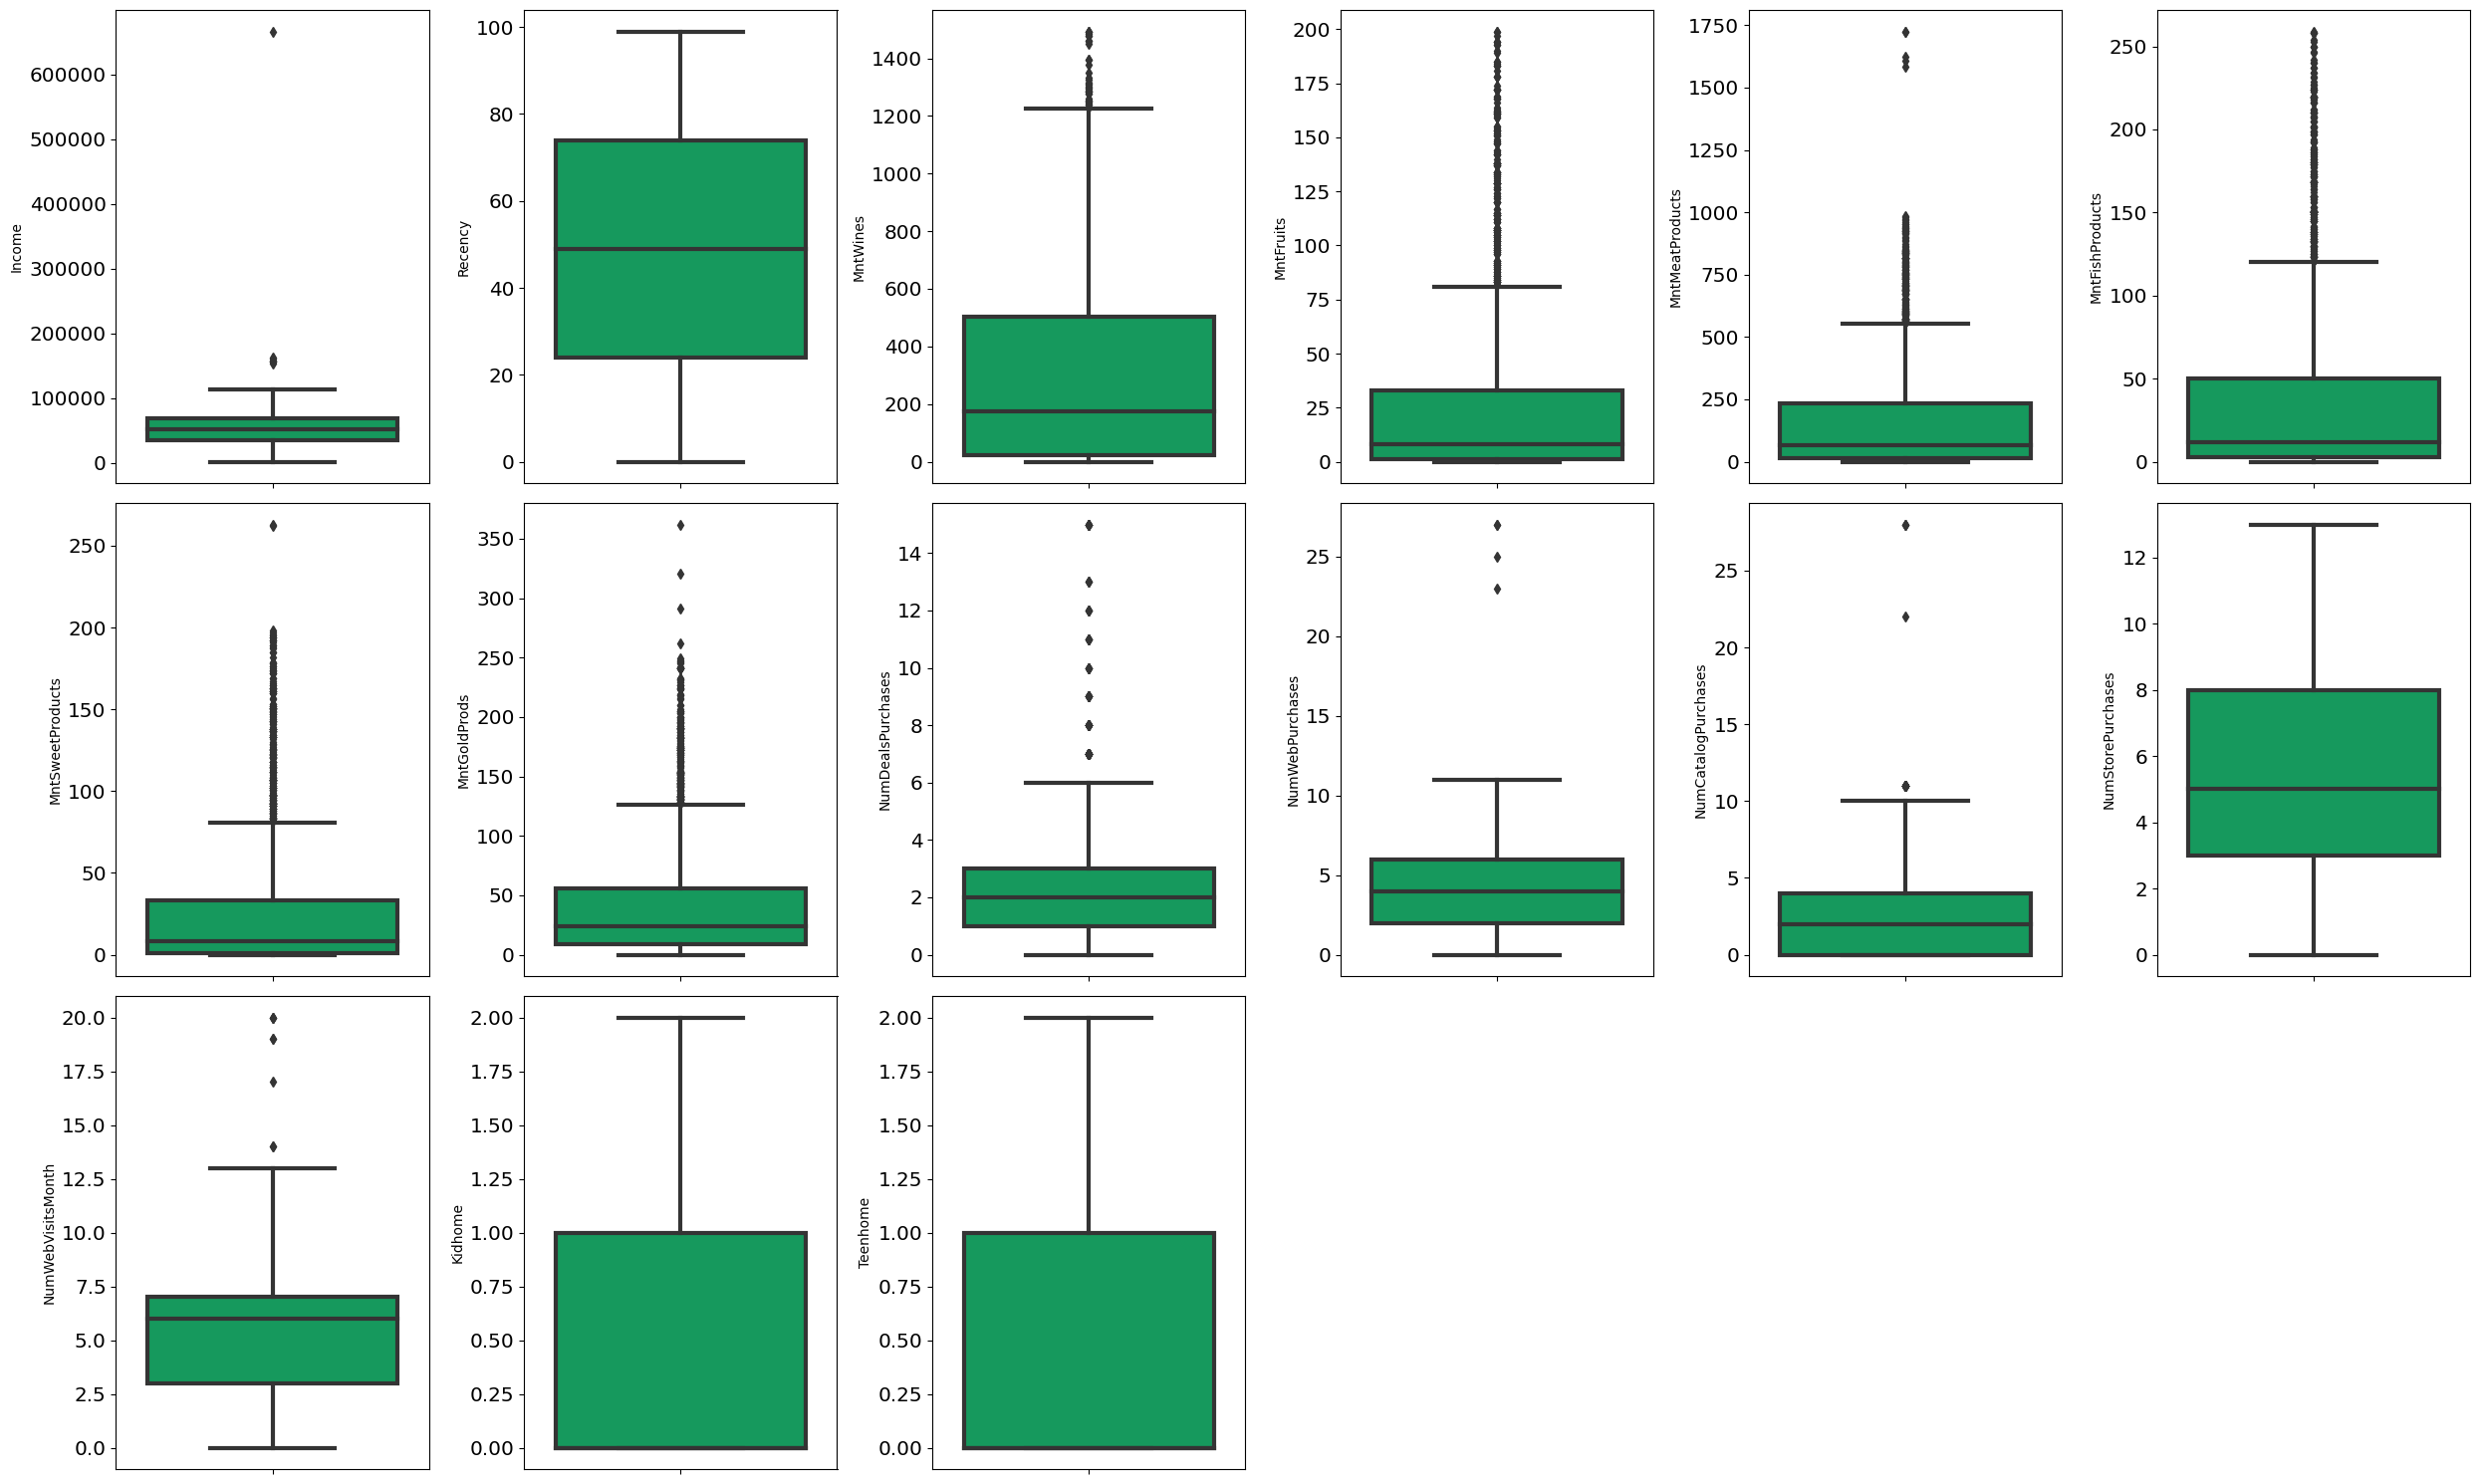

In [ ]:
# Individual Boxplot
plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df[nums[i]], color='#00af5f', orient='v')
    plt.tight_layout()

Terdapat outlier pada kolom Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, dan NumWebVisitMonth.

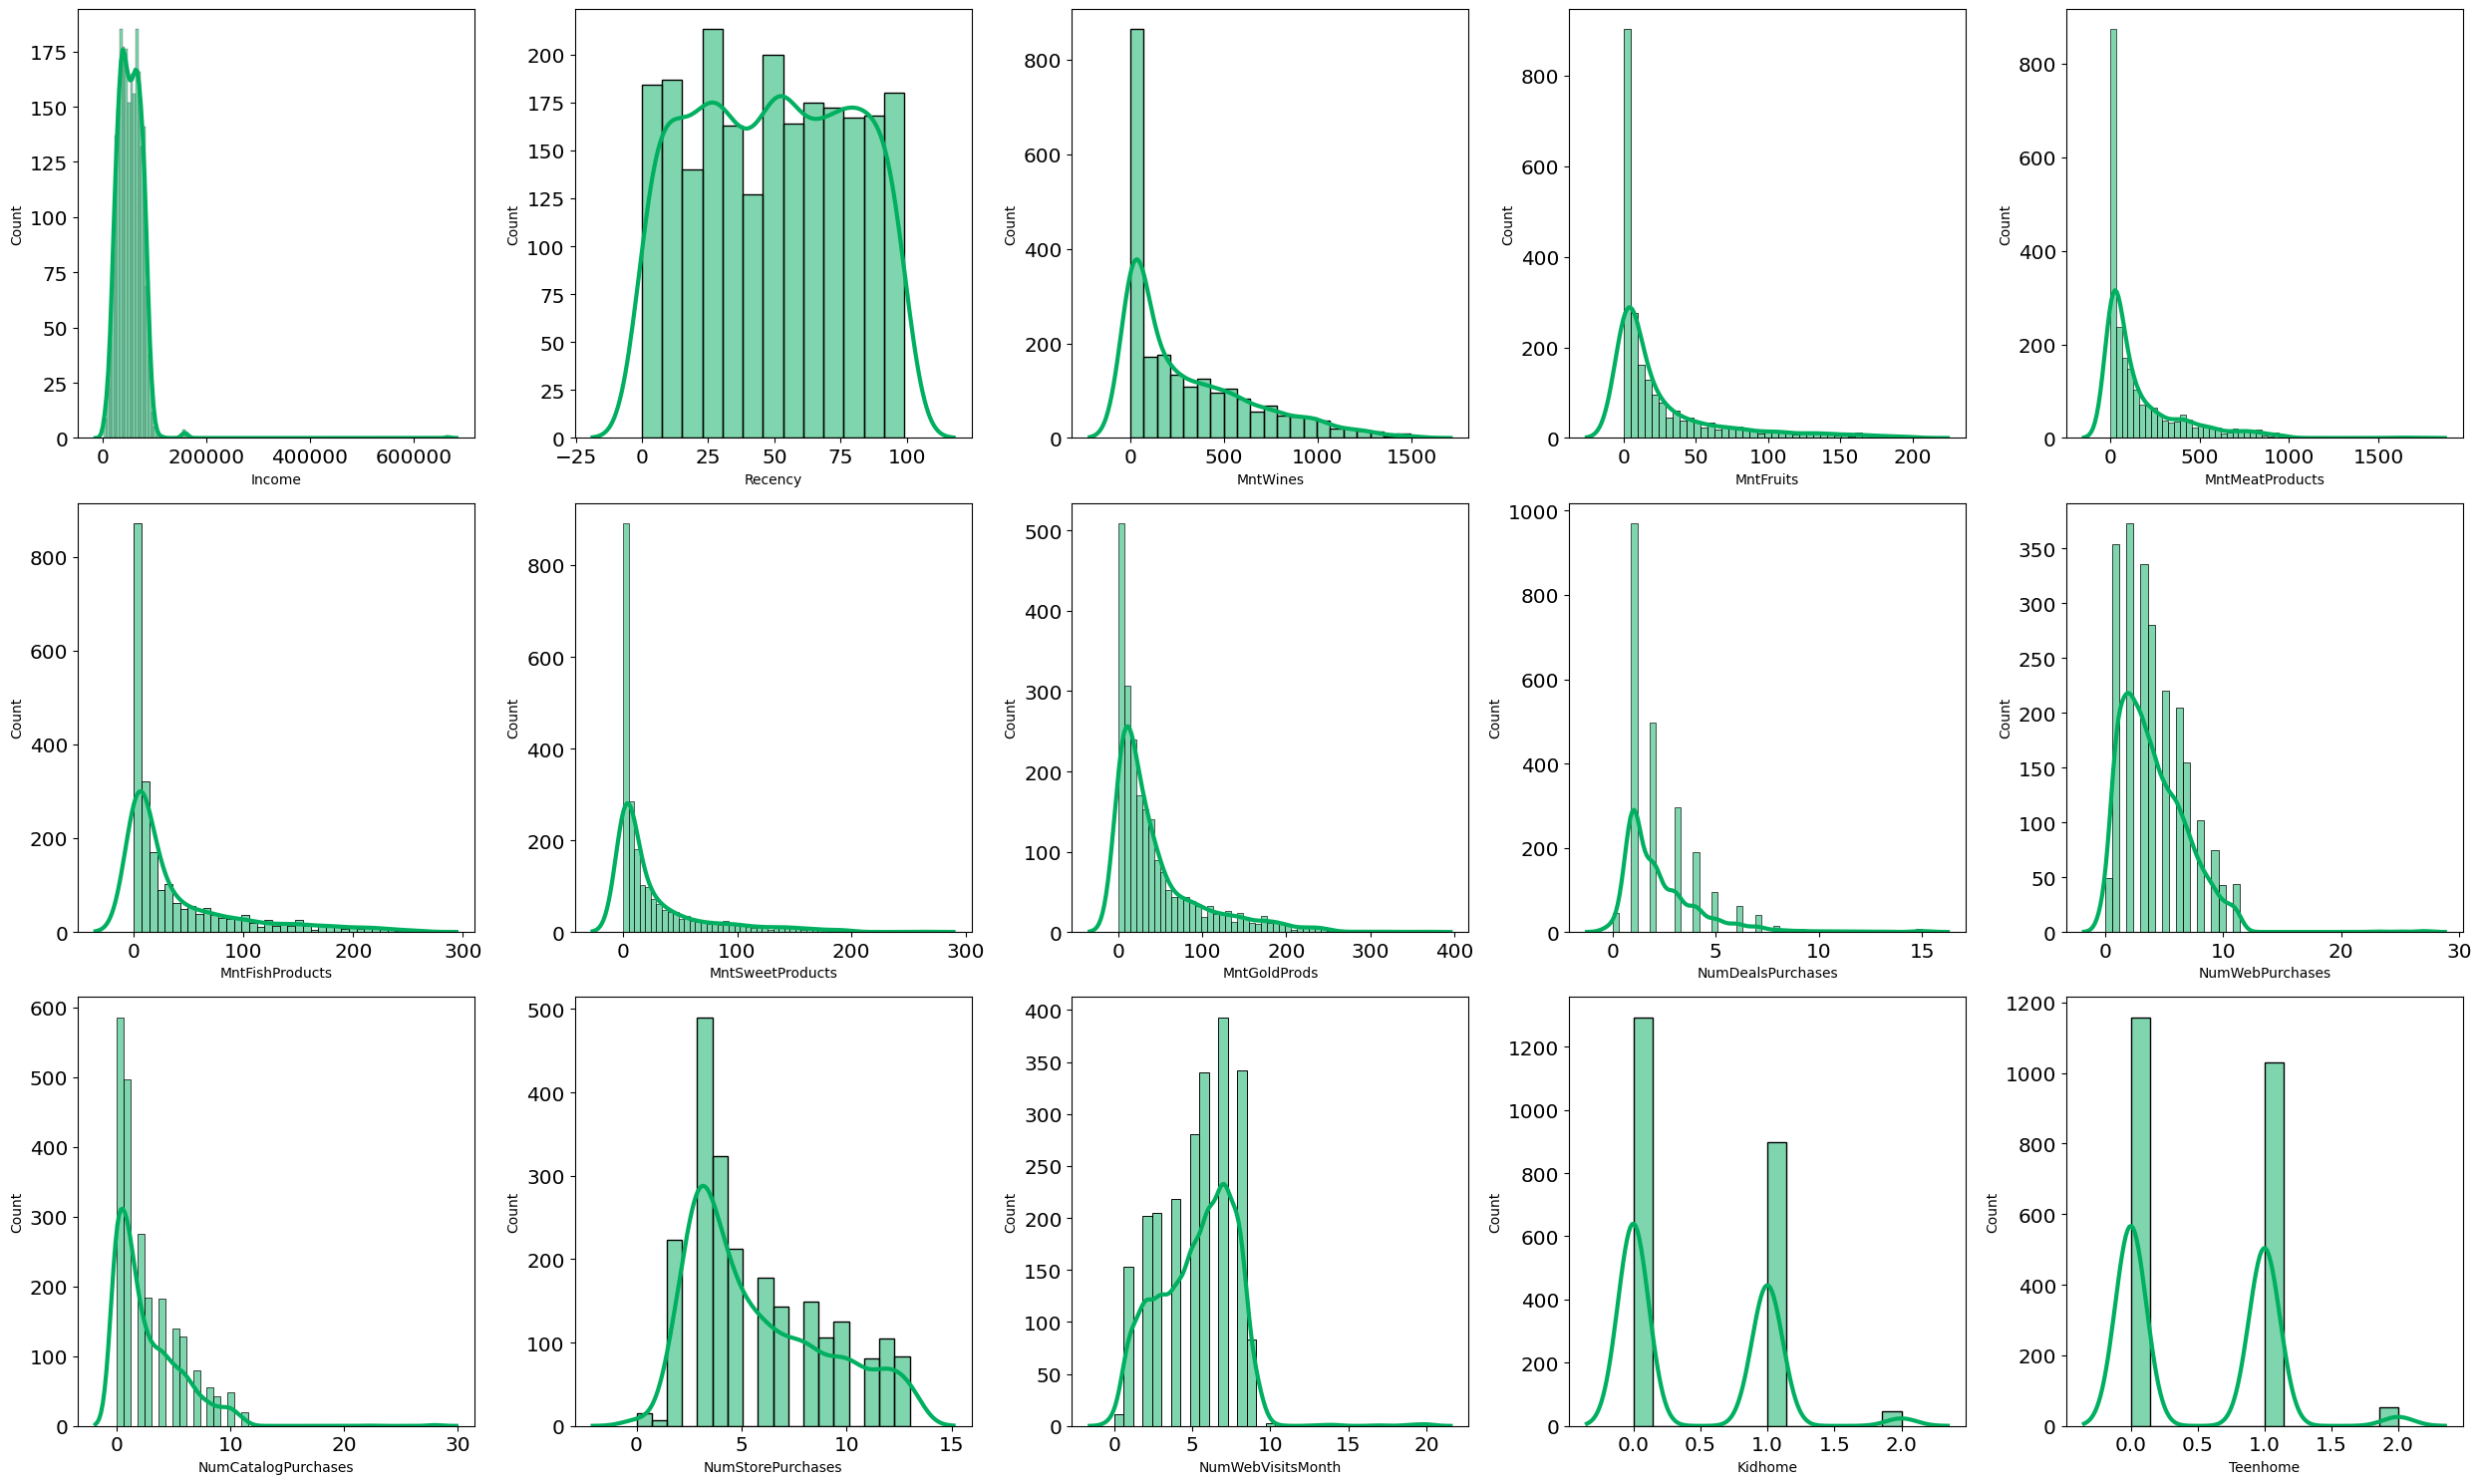

In [ ]:
# Individual Distplot
plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1) 
    sns.histplot(df[nums[i]], kde=True, kde_kws=dict(cut=3), color='#00af5f')
    plt.tight_layout()

- Kolom yang memiliki distribution normal yaitu kolom Recency.
- Kolom yang memiliki distribution right skewed, diantaranya yaitu kolom Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, dan NumWebVisitsMonth.
- Sedangkan kolom Kidhome dan Teenhome memiliki bimodal distribution.

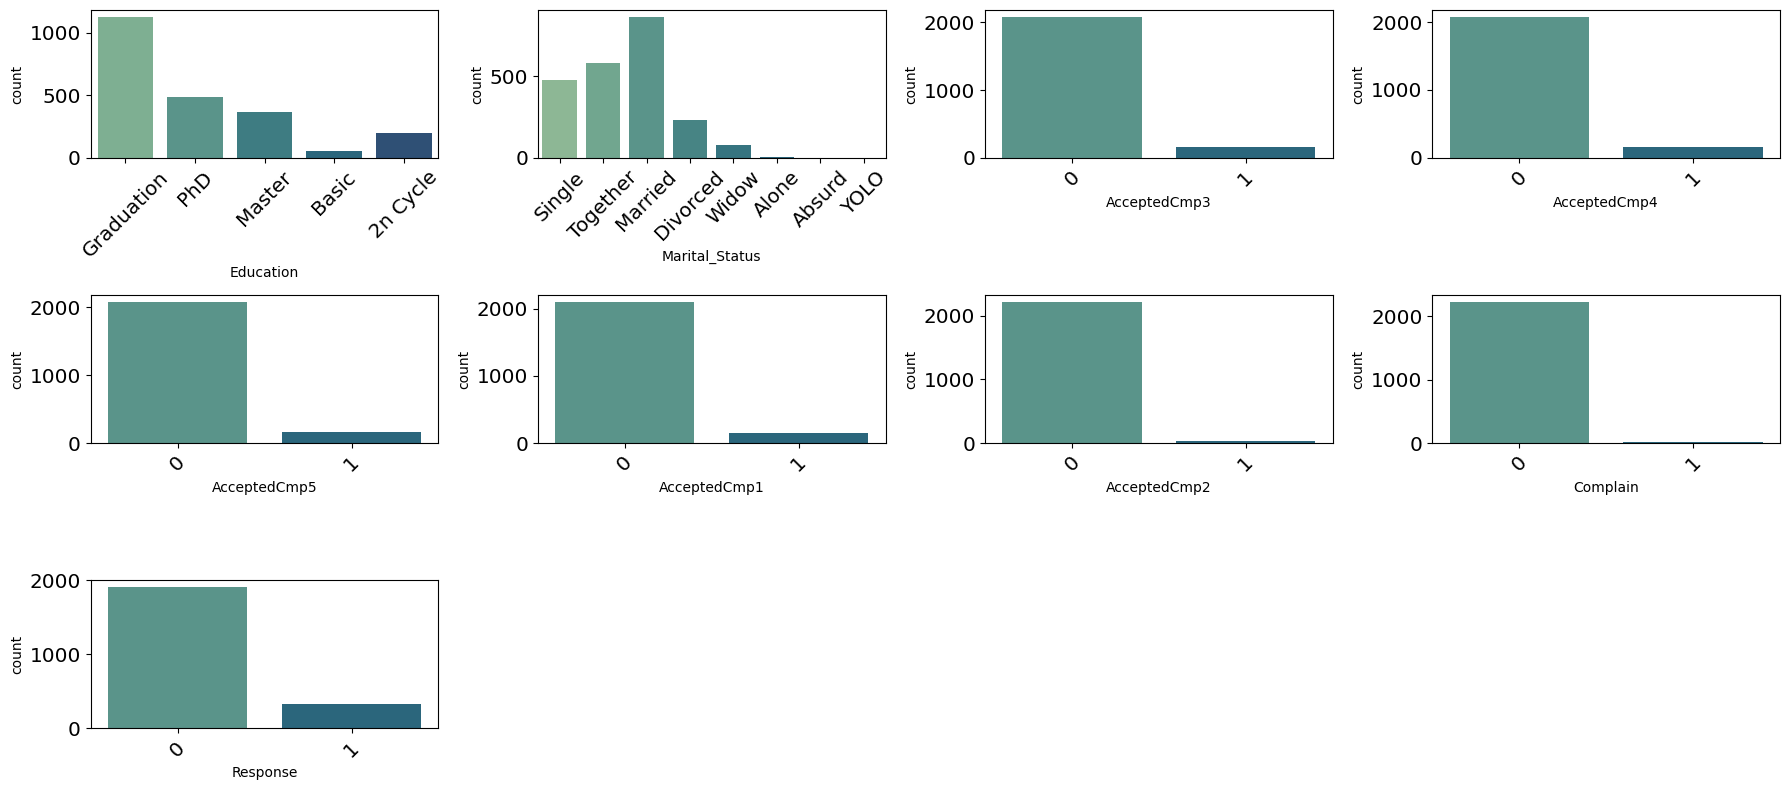

In [ ]:
# Individual Countplot
plt.figure(figsize=(18, 8))
for i in range(0, len(cats)):
    plt.subplot(3, 4, i+1)
    sns.countplot(x = df[cats[i]], palette='crest', orient='h')
    plt.xticks(rotation=45)
    plt.tight_layout()

- Kolom Education dan Marital_Status memiliki beberapa kategori yang valuenya sama dan ambigu.
- Kolom AcceptedCmp1, AcceptedCmp2, AcceptedCmp3 ,AcceptedCmp4, AcceptedCmp5, Complain, dan Response value didominasi dengan value 0.

## Bivariate Analysis

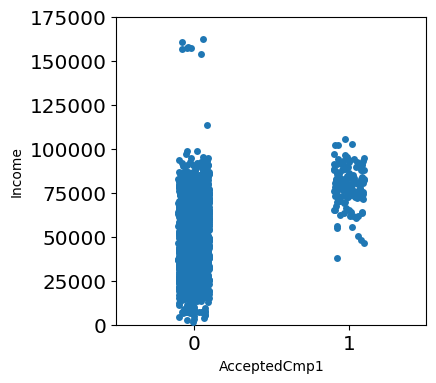

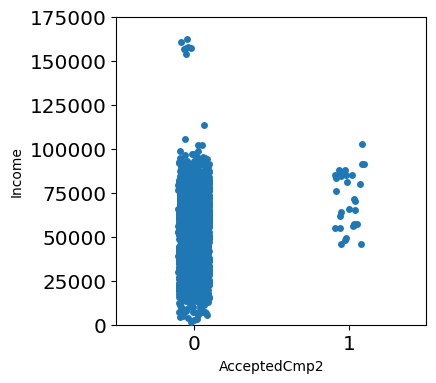

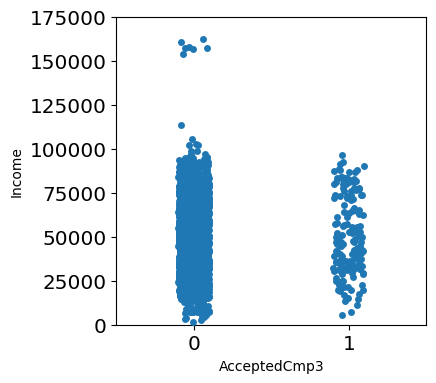

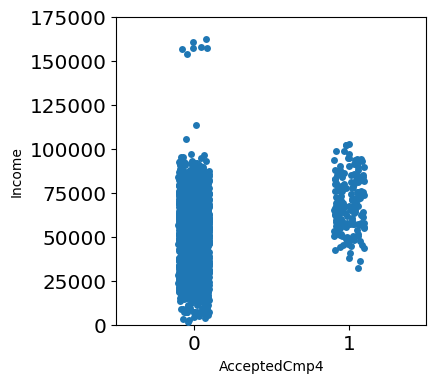

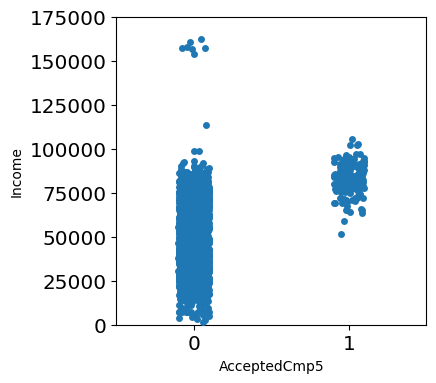

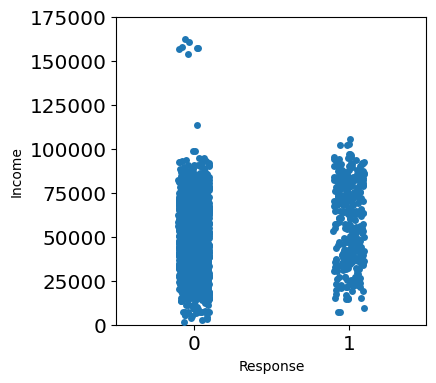

In [ ]:
# Income vs. Campaign

Accepted_Campaign = ['AcceptedCmp1' ,'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

for i in Accepted_Campaign:
  plt.figure(figsize=(4, 4))
  sns.stripplot(data=df, x=i, y='Income')
  plt.ylim(0, 175000)
  plt.show()

Customer dengan income diatas 120000 tidak ada yang menerima campaign perusahaan. Jadi sebaiknya perusahaan fokus melakukan campaign kepada customer dengan income dibawah 120000.

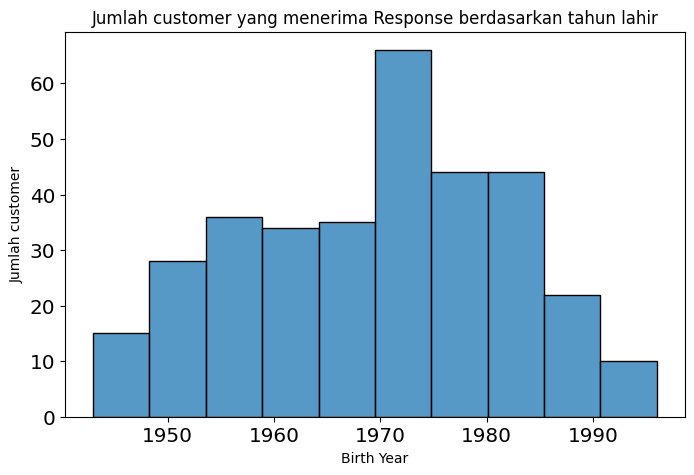

In [ ]:
# Birth year vs. Response

df_resp_yes = df[df['Response'] == 1]
plt.figure(figsize=(8, 5))
sns.histplot(data=df_resp_yes, x='Year_Birth')
plt.xlabel('Birth Year')
plt.ylabel('Jumlah customer')
plt.title('Jumlah customer yang menerima Response berdasarkan tahun lahir')
plt.show()

Kategori customer yang menerima Response (marketing campaign terakhir) terbanyak berasal dari tahun lahir 1970-1975. Jika perusahaan harus memprioritaskan beberapa customer saja, maka perusahaan dapat memilih customer yang lahir pada tahun 1970-1975 untuk menawarkan sebuah campaign.

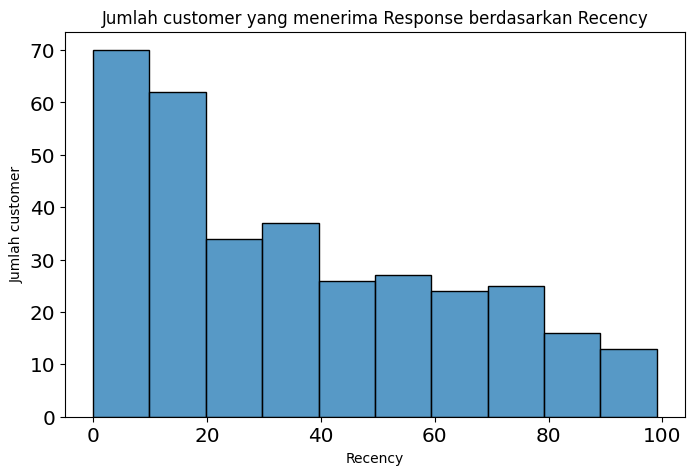

In [ ]:
# Recency vs. Response

df_resp_yes = df[df['Response'] == 1]
plt.figure(figsize=(8, 5))
sns.histplot(data=df_resp_yes, x='Recency')
plt.xlabel('Recency')
plt.ylabel('Jumlah customer')
plt.title('Jumlah customer yang menerima Response berdasarkan Recency')
plt.show()

Berdasarkan recency (kapan terakhir kali customer melakukan pembayaran), semakin rendah recency maka semakin besar kemungkinan customer tersebut menerima marketing campaign perusahaan yang terakhir (Response). Sehingga marketing campaign selanjutnya dapat difokuskan kepada customer dengan recency yang rendah.

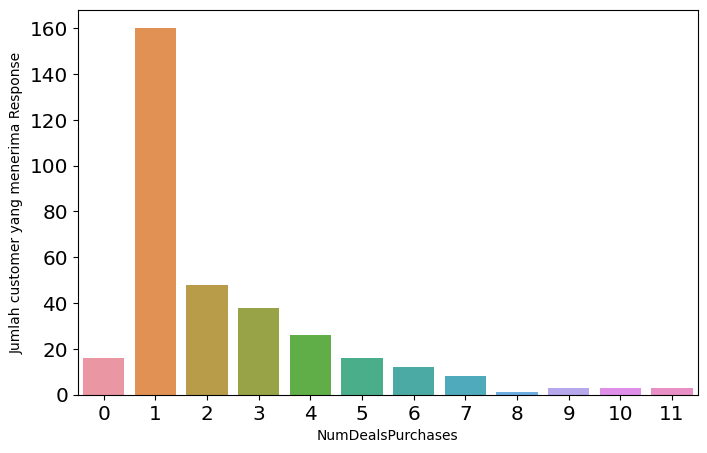

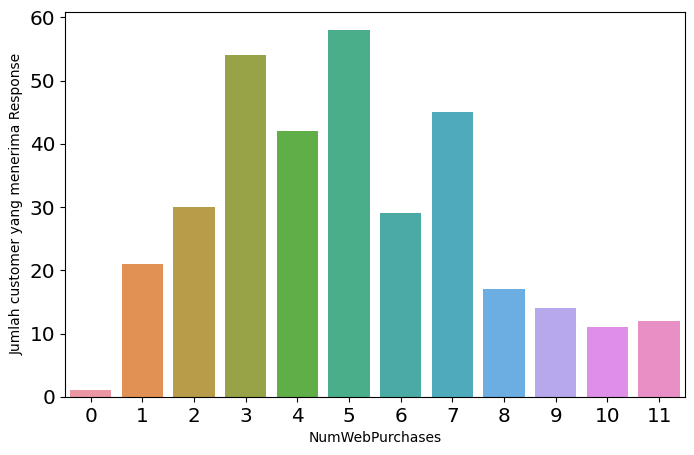

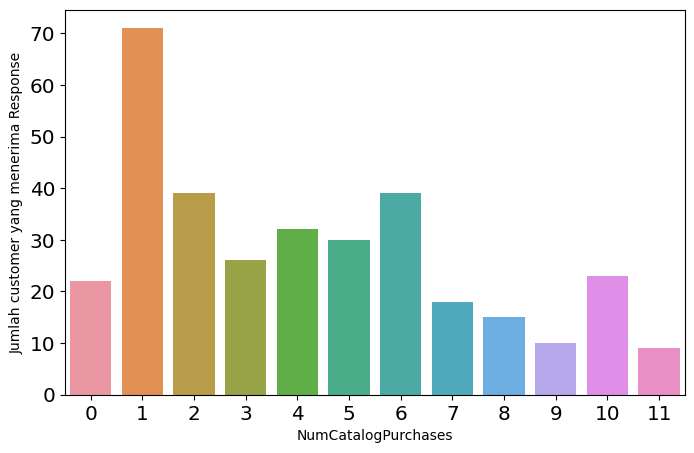

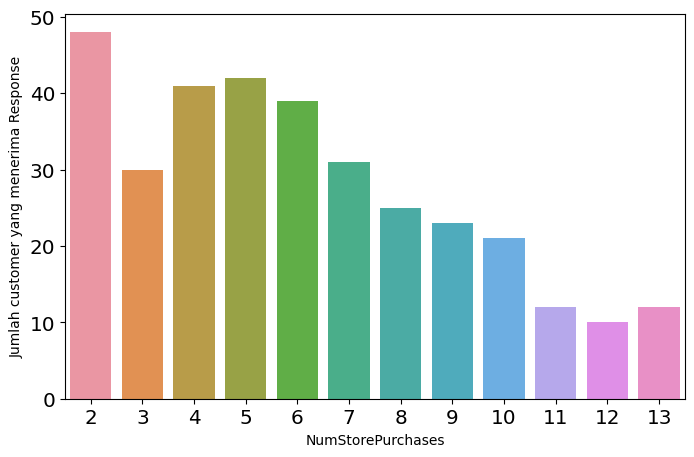

In [ ]:
# Purchase type vs. Response

purchase_type = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

df_resp_yes = df[df['Response'] == 1]
for i in purchase_type:
  plt.figure(figsize=(8, 5))
  sns.countplot(data=df_resp_yes, x=i)
  plt.xlabel(i)
  plt.ylabel('Jumlah customer yang menerima Response')
  plt.show()

Semakin sedikit pembelian yang dilakukan (baik yang menggunakan diskon ataupun yang melalui web, catalog, store), maka semakin besar kemungkinan customer untuk menerima Response (marketing campaign terakhir). Sehingga perusahaan dapat menargetkan campaign kepada customer dengan jumlah pembelian yang masih sedikit.

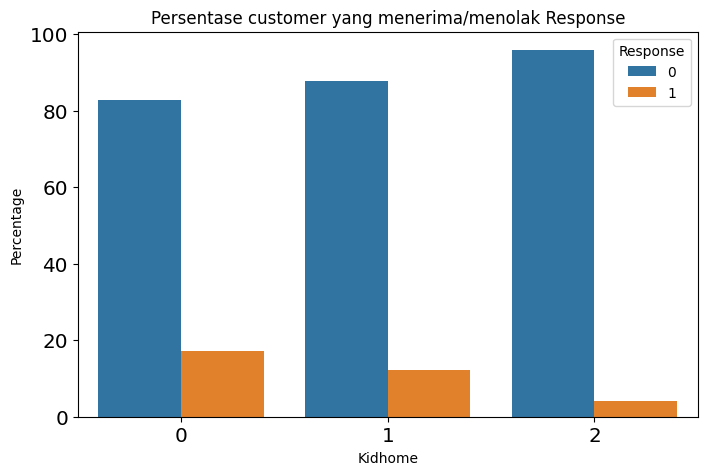

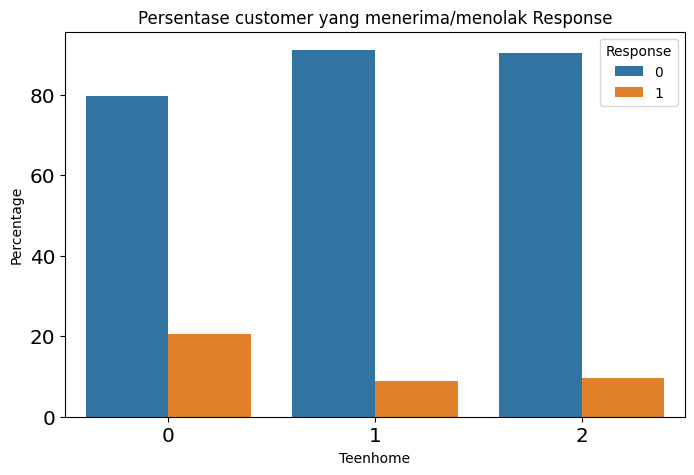

In [ ]:
# Kid and teen vs. Response

kid_teen = ['Kidhome', 'Teenhome']

for i in kid_teen:
  df_temp = df.groupby([i, 'Response'])['ID'].count().reset_index()
  df_temp_2 = df.groupby([i])['ID'].count().reset_index()
  df_merge = df_temp.merge(df_temp_2, on=i, how='inner')
  df_merge.columns = [i, 'Response', 'CountCust', 'TotalCust']
  df_merge['Percentage'] = df_merge['CountCust'] / df_merge['TotalCust'] * 100
  
  plt.figure(figsize=(8, 5))
  sns.barplot(x = i, y = 'Percentage', data = df_merge, hue = 'Response')
  plt.title('Persentase customer yang menerima/menolak Response')
  plt.show()

Semakin tinggi jumlah anak/remaja yang dimiliki customer, maka semakin kecil kemungkinan customer menerima Response (marketing campaign terakhir), sehingga lebih baik perusahaan menargetkan campaign kepada customer yang tidak memiliki anak/remaja.

## Multivariate Analysis

<Axes: >

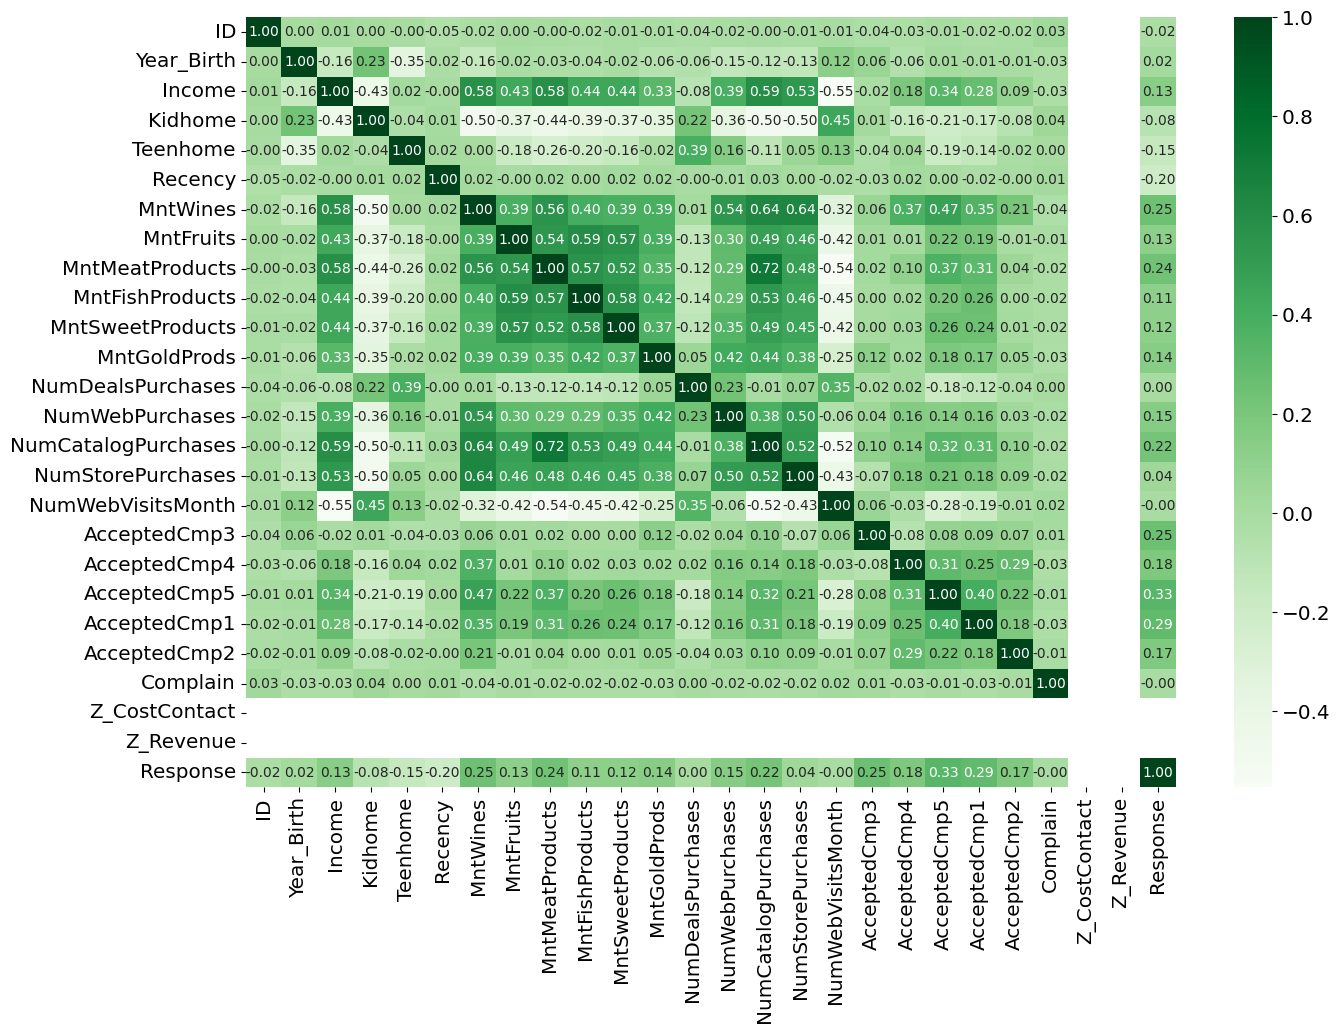

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')

Dari korelasi di atas kita tidak menemukan adanya multicorrelation (korelasi antar variable) sehingga kita dapat menggunakan semua feature untuk dilakukan modeling.

# Stage 2 (Data Preprocessing)

Pada data preprocessing kita membutuhkan data yang bersih sehingga mampu diterapkan pada beberapa model machine learning.

Tahapan-tahapan yang perlu dilakukan adalah:
1. Handle Missing Value
2. Feature Extraction;
    - Membuat kolom Age dari kolom Year_birth
    - Membuat kolom Dependents dari kolom Kidhome dan Teenhome
3. Pada kolom Education, kategori 2n Cycle diubah menjadi Master
4. Melakukan Label Encoding pada kolom Education
5. Pada kolom Marital Status, Mengubah beberapa kategori yang ambigu dan memiliki arti yang sama.
6. Melakukan One Hot Encoding (OHE) pada kolom Marital Status
7. Feature Selection
8. Handle outliers with Yeo-Johnson transformation
9. Split Data Train and Test
10. Handle Class Imbalance with Random Oversampling

## Handling Missing Value

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Terdapat 24 missing value pada kolom 'Income.

In [ ]:
(df.isna().sum()/df.shape[0]*100)['Income']

1.0714285714285714

Data yang hilang adalah sebanyak 1.07%. Maka dari itu, dikarenakan data yang hilang kurang dari 5% data total, baris dengan data yang hilang akan dihapuskan.

In [ ]:
df.dropna(inplace=True, subset=['Income'])

## Feature Extraction

In [ ]:
df['Age'] = 2023 - df['Year_Birth']
df['Dependents'] = df['Kidhome'] + df['Teenhome']

## Label Encoding

Label Encoding akan dilakukan pada kolom 'Education' yang memiliki tipe data ordinal.

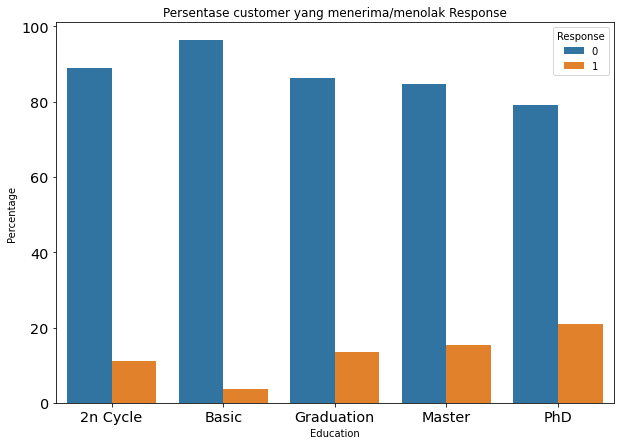

In [ ]:
df_temp = df.groupby(['Education', 'Response'])['ID'].count().reset_index()
df_temp_2 = df.groupby(['Education'])['ID'].count().reset_index()
df_merge = df_temp.merge(df_temp_2, on='Education', how='inner')
df_merge.columns = ['Education', 'Response', 'CountCust', 'TotalCust']
df_merge['Percentage'] = df_merge['CountCust'] / df_merge['TotalCust'] * 100
  
sns.barplot(x = 'Education', y = 'Percentage', data = df_merge, hue = 'Response')
plt.title('Persentase customer yang menerima/menolak Response')
plt.show()

Kategori "2n Cycle" memiliki arti yang sama dengan "Master". Persentase customer yang menolak dan menerima respon untuk kategori '2n Cycle' dan 'Master' juga kurang lebih sama. Maka dari itu, baris yang memiliki kategori "2n Cycle" akan dihapus dan digantikan dengan kaegori "Master".

In [ ]:
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')
x = np.array(df['Education'])
print(np.unique(x))

['Basic' 'Graduation' 'Master' 'PhD']


Dilakukan perubahan feature categorical menjadi numeric sebagai berikut:

- 'Basic' --> 0
- 'Graduation' --> 1
- 'Master' --> 2
- 'PhD' --> 3

In [ ]:
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3    
}
df['Education'] = df['Education'].map(mapping_education)

## One Hot Encoding (OHE)

One Hot Encoding akan dilakukan pada kolom 'Marital_Status' yang memiliki lebih dari 2 kategori dan tidak bertipe data ordinal.

In [ ]:
x = np.array(df['Marital_Status'])
print(np.unique(x))

['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


Sebelum dilakukan OHE, banyak kategori dalam kolom 'Marital_Status' yang ambigu dan memiliki arti yang sama. Maka dari itu, dilakukan terlebih dahulu pergantian nama kategori.

In [ ]:
# Mengganti kategori 'Absurd' dan 'YOLO' menjadi 'Others'
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'YOLO'],'Others')
# Mengganti kategori 'Alone' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Alone'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

x = np.array(df['Marital_Status'])
print(np.unique(x))

['Divorced' 'Married' 'Others' 'Single' 'Widow']


In [ ]:
# Melakukan OHE
ohe = pd.get_dummies(df['Marital_Status'], prefix = 'Status')
df = df.join(ohe)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   int64  
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
# Menghapus kolom Marital Status
df = df.drop(columns=['Marital_Status']).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   int64  
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

## Feature Selection

In [ ]:
# membuang feature yang kurang relevan

drop_feature = ['ID', 'Z_CostContact', 'Z_Revenue', 'Complain', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer']
df = df.drop(columns=drop_feature)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2216 non-null   int64  
 3   MntWines             2216 non-null   int64  
 4   MntFruits            2216 non-null   int64  
 5   MntMeatProducts      2216 non-null   int64  
 6   MntFishProducts      2216 non-null   int64  
 7   MntSweetProducts     2216 non-null   int64  
 8   MntGoldProds         2216 non-null   int64  
 9   NumDealsPurchases    2216 non-null   int64  
 10  NumWebPurchases      2216 non-null   int64  
 11  NumCatalogPurchases  2216 non-null   int64  
 12  NumStorePurchases    2216 non-null   int64  
 13  NumWebVisitsMonth    2216 non-null   int64  
 14  AcceptedCmp3         2216 non-null   int64  
 15  AcceptedCmp4         2216 non-null   i

Alasan drop feature:

- ID: ID bersifat unik di setiap row dengan korelasi sebesar -0.02 dengan Response sehingga tidak akan mempengaruhi target
- Z_CostContract: bernilai 3 di setiap row sehingga tidak memberikan informasi yang signifikan terhadap model prediksi
- Z_Revenue: bernilai 11 di setiap row sehingga tidak memberikan informasi yang signifikan terhadap model prediksi
- Complain: memiliki nilai korelasi senilai -0.00 dengan Response dan hanya sedikikt dari customer yang pernah melakukan complain, sehingga tidak signifikan terhadap target
- Year_Birth: dihapus dan dibuat feature baru 'Age' karena lebih menggambarkan umur customer
- Kidhome dan Teenhome: dihapus dan dibuat feature baru 'Dependents' untuk lebih menggambarkan berapa jumlah anggota keluarga yg dependent
- Dt_Customer: dihapus karena tanggal customer mulai bergabung tidak mempengaruhi model prediksi

## Handling Outliers

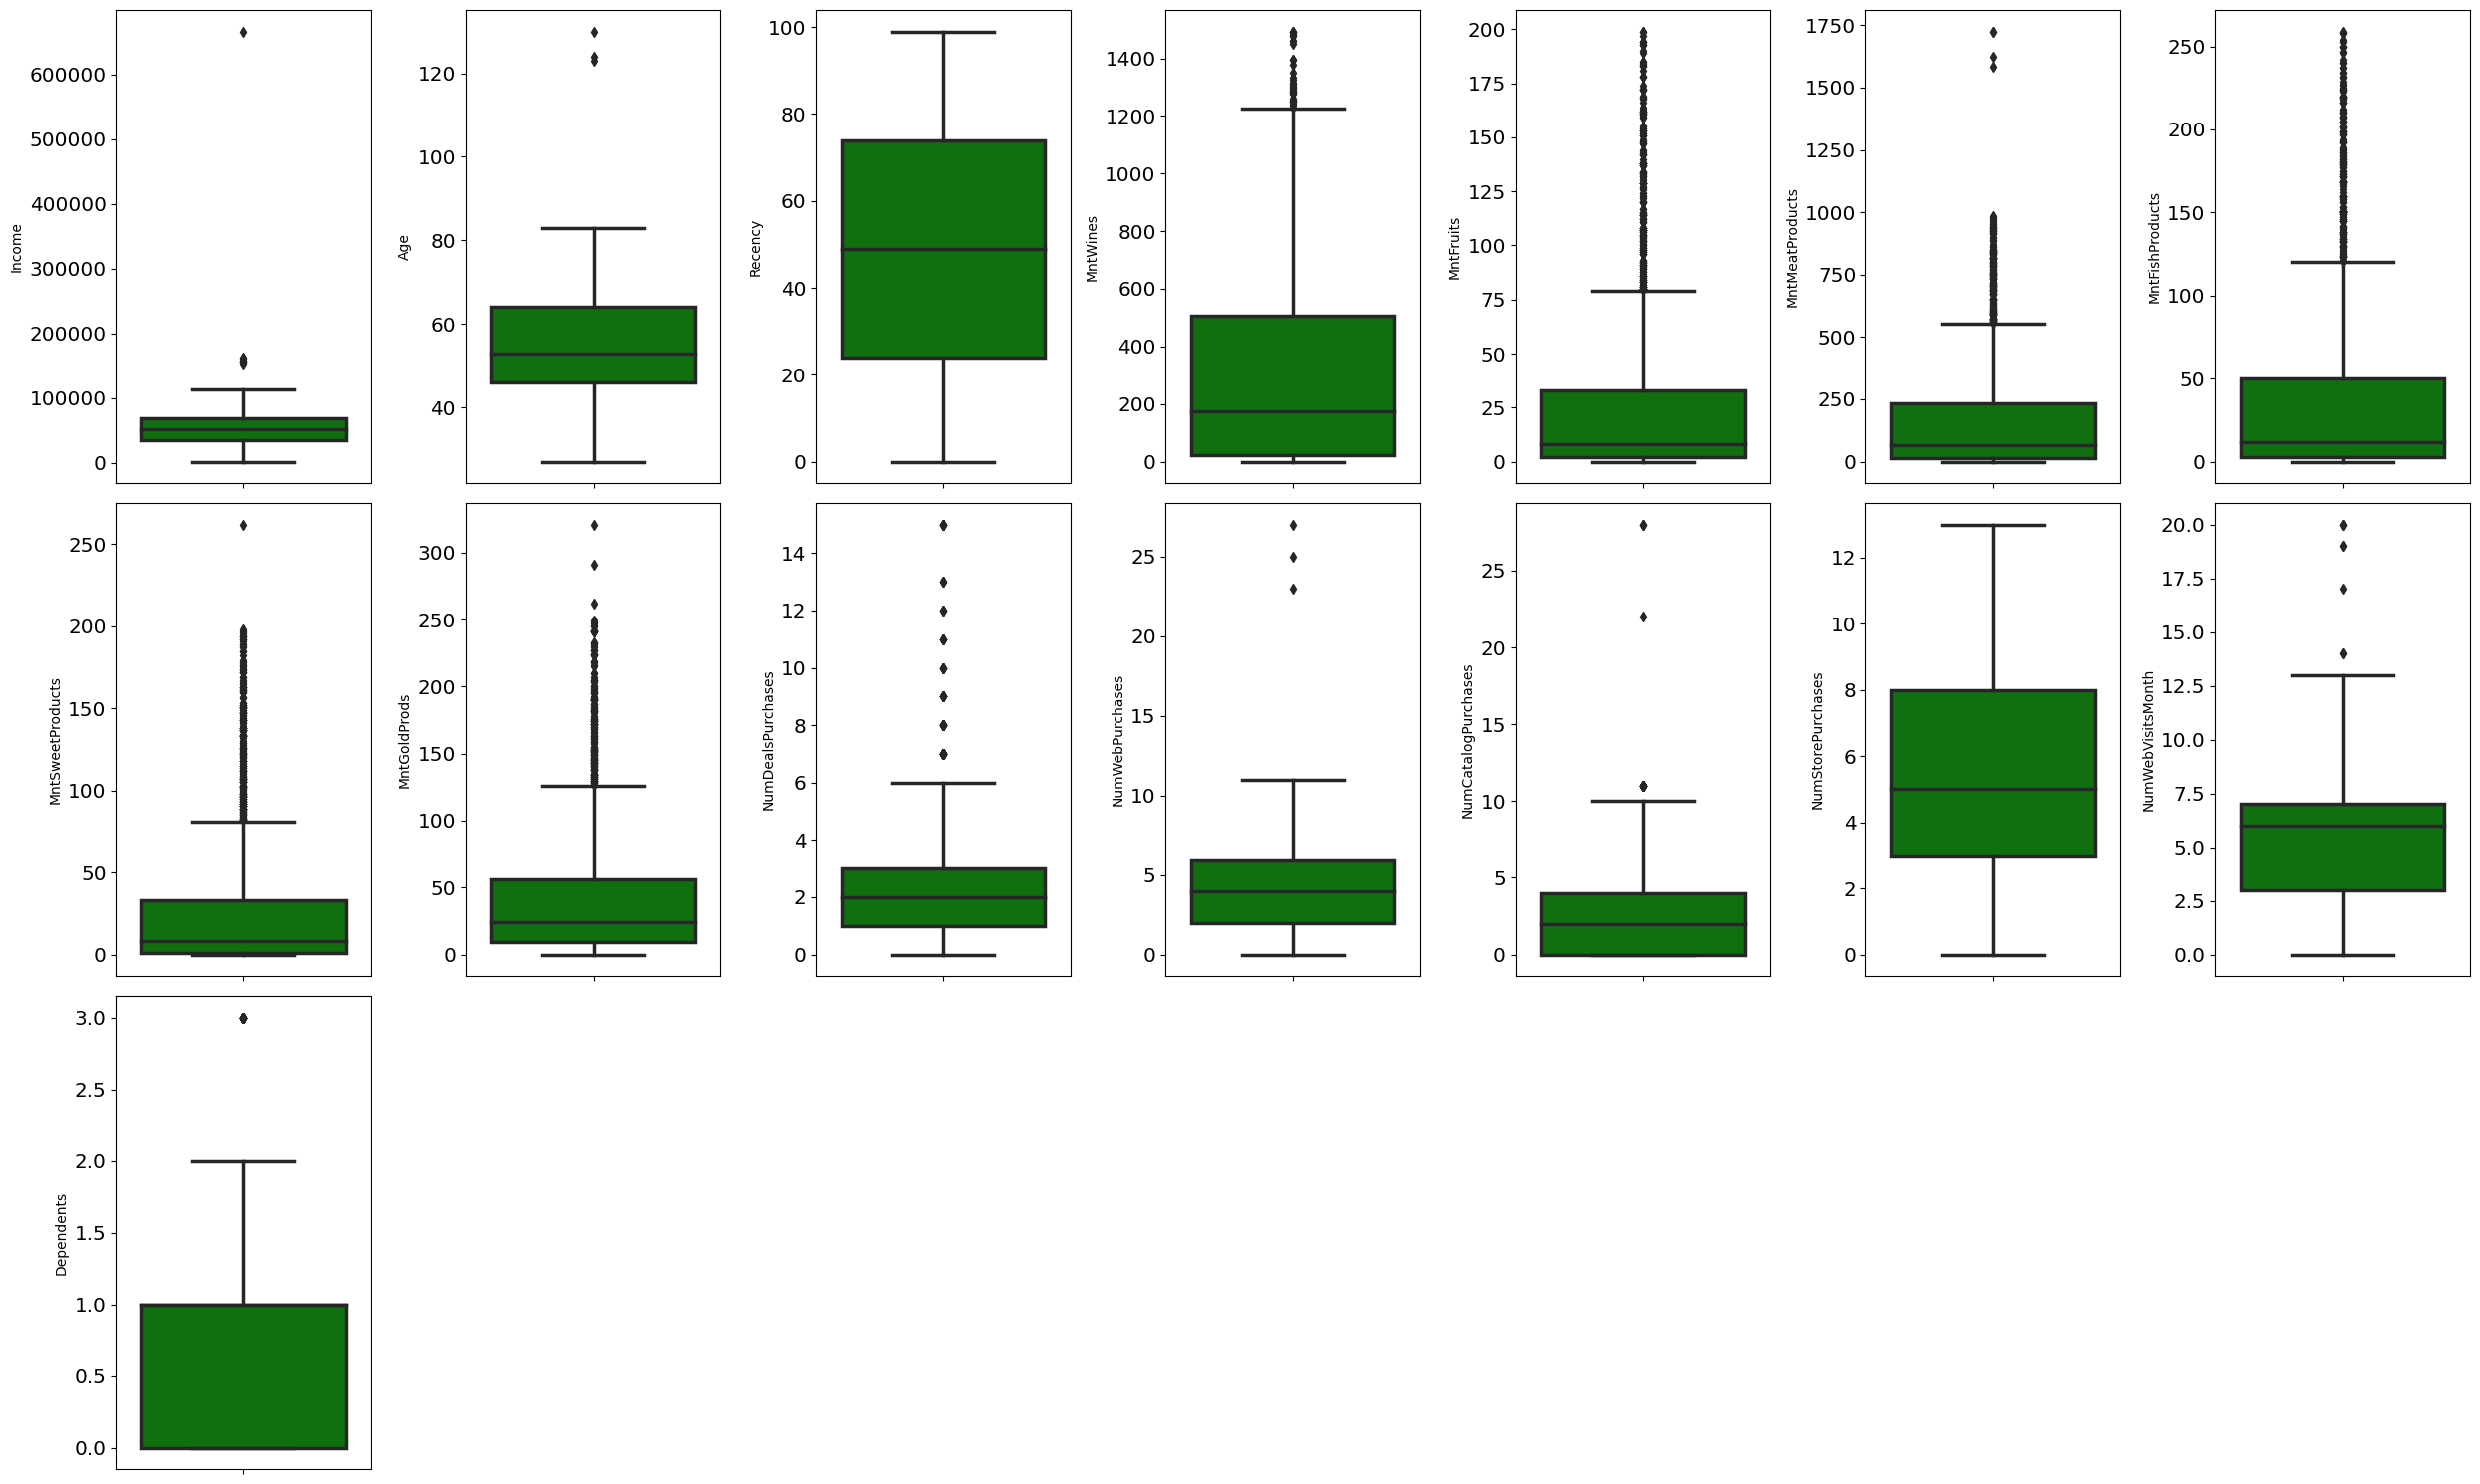

In [ ]:
nums=['Income','Age','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Dependents']

plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Diketahui kolom yang memiliki data outliers adalah:

- Income
- Age
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases
- NumWebVisitsMonth
- Dependents

Dikarenakan banyak kolom yang memiliki data outliers dan dataset hanya sedikit, diputuskan untuk mengahndle data outlier ini dengan menggunakan method Yeo-Johnson transformation.

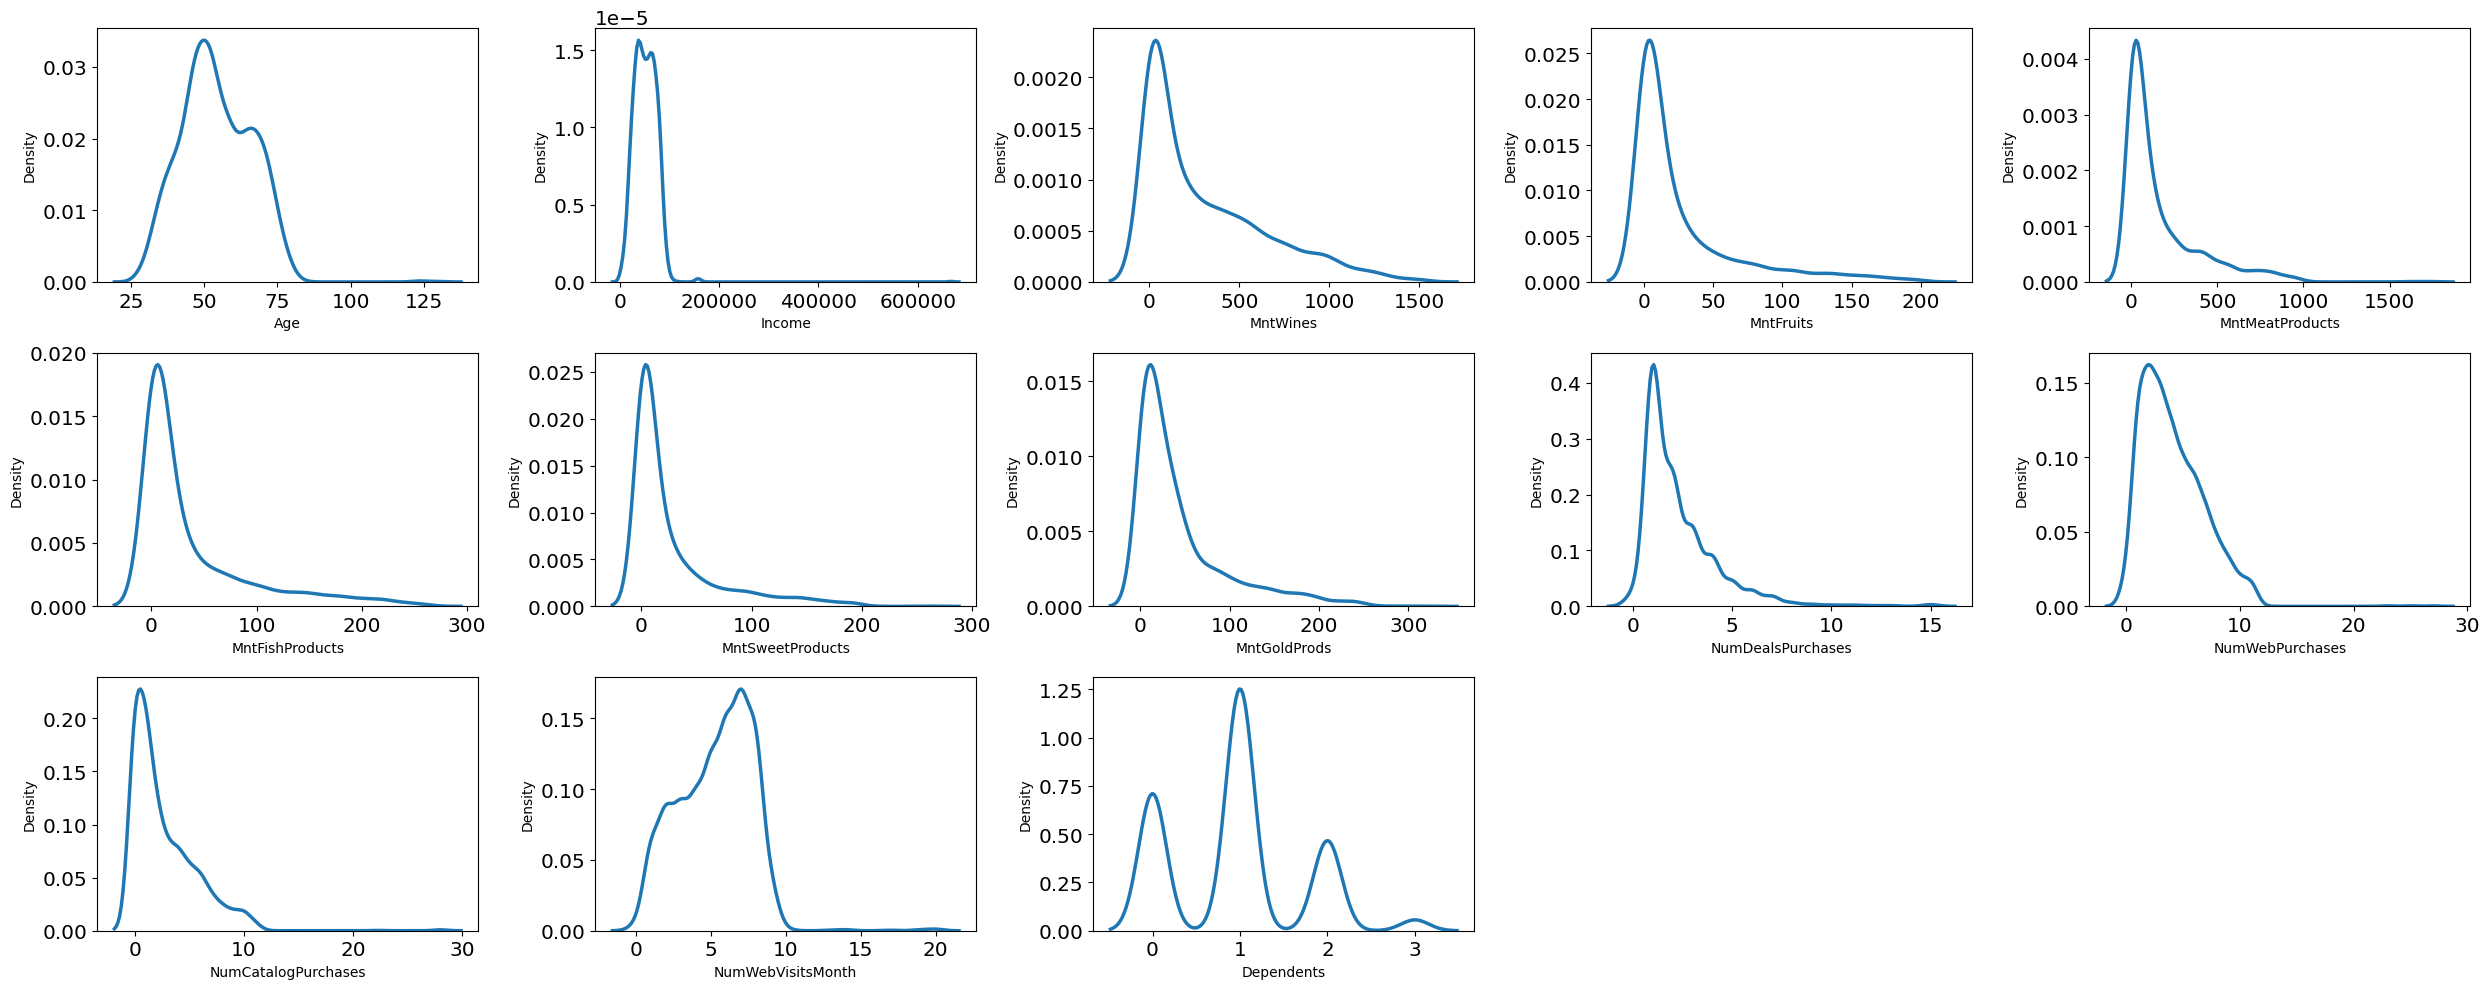

In [ ]:
data = ['Age', 'Income', 'MntWines', 'MntFruits', 
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
        'NumCatalogPurchases',  'NumWebVisitsMonth', 'Dependents']
plt.figure(figsize=(25, 10))

for i in range(0, len(data)):
  plt.subplot(3, 5, i+1)
  sns.kdeplot(df[data[i]])
  plt.tight_layout()

In [ ]:
for i in range(0, len(data)):
  skew = df[data[i]].skew(axis = 0, skipna = True)
  print(f'{data[i]}: {skew}')

Age: 0.35366147002882264
Income: 6.7634873728111184
MntWines: 1.1707200955543913
MntFruits: 2.101657525150595
MntMeatProducts: 2.0255768067844633
MntFishProducts: 1.916368950232168
MntSweetProducts: 2.1033275863706797
MntGoldProds: 1.8392309361295713
NumDealsPurchases: 2.415271762315824
NumWebPurchases: 1.1970370130708343
NumCatalogPurchases: 1.8810750511540515
NumWebVisitsMonth: 0.2180430456390019
Dependents: 0.4087482263114007


Berdasarkan website [oracle](https://https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html#:~:text=A%20skewness%20value%20greater%20than,the%20distribution%20is%20fairly%20symmetrical.) skew dianggap masih mempunyai distribusi simetris pada range -0.5 sampai 0.5. Maka dari itu akan dilakukan log transformation pada kolom:
- Income
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases

### Yeo-Johnson Transformation


In [ ]:
log = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases']

df_log = df

In [ ]:
# Yeo-Johnson Transformation
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson')

for i in range(0, len(log)):
  df_log[log[i]] = pt.fit_transform(df[[log[i]]])

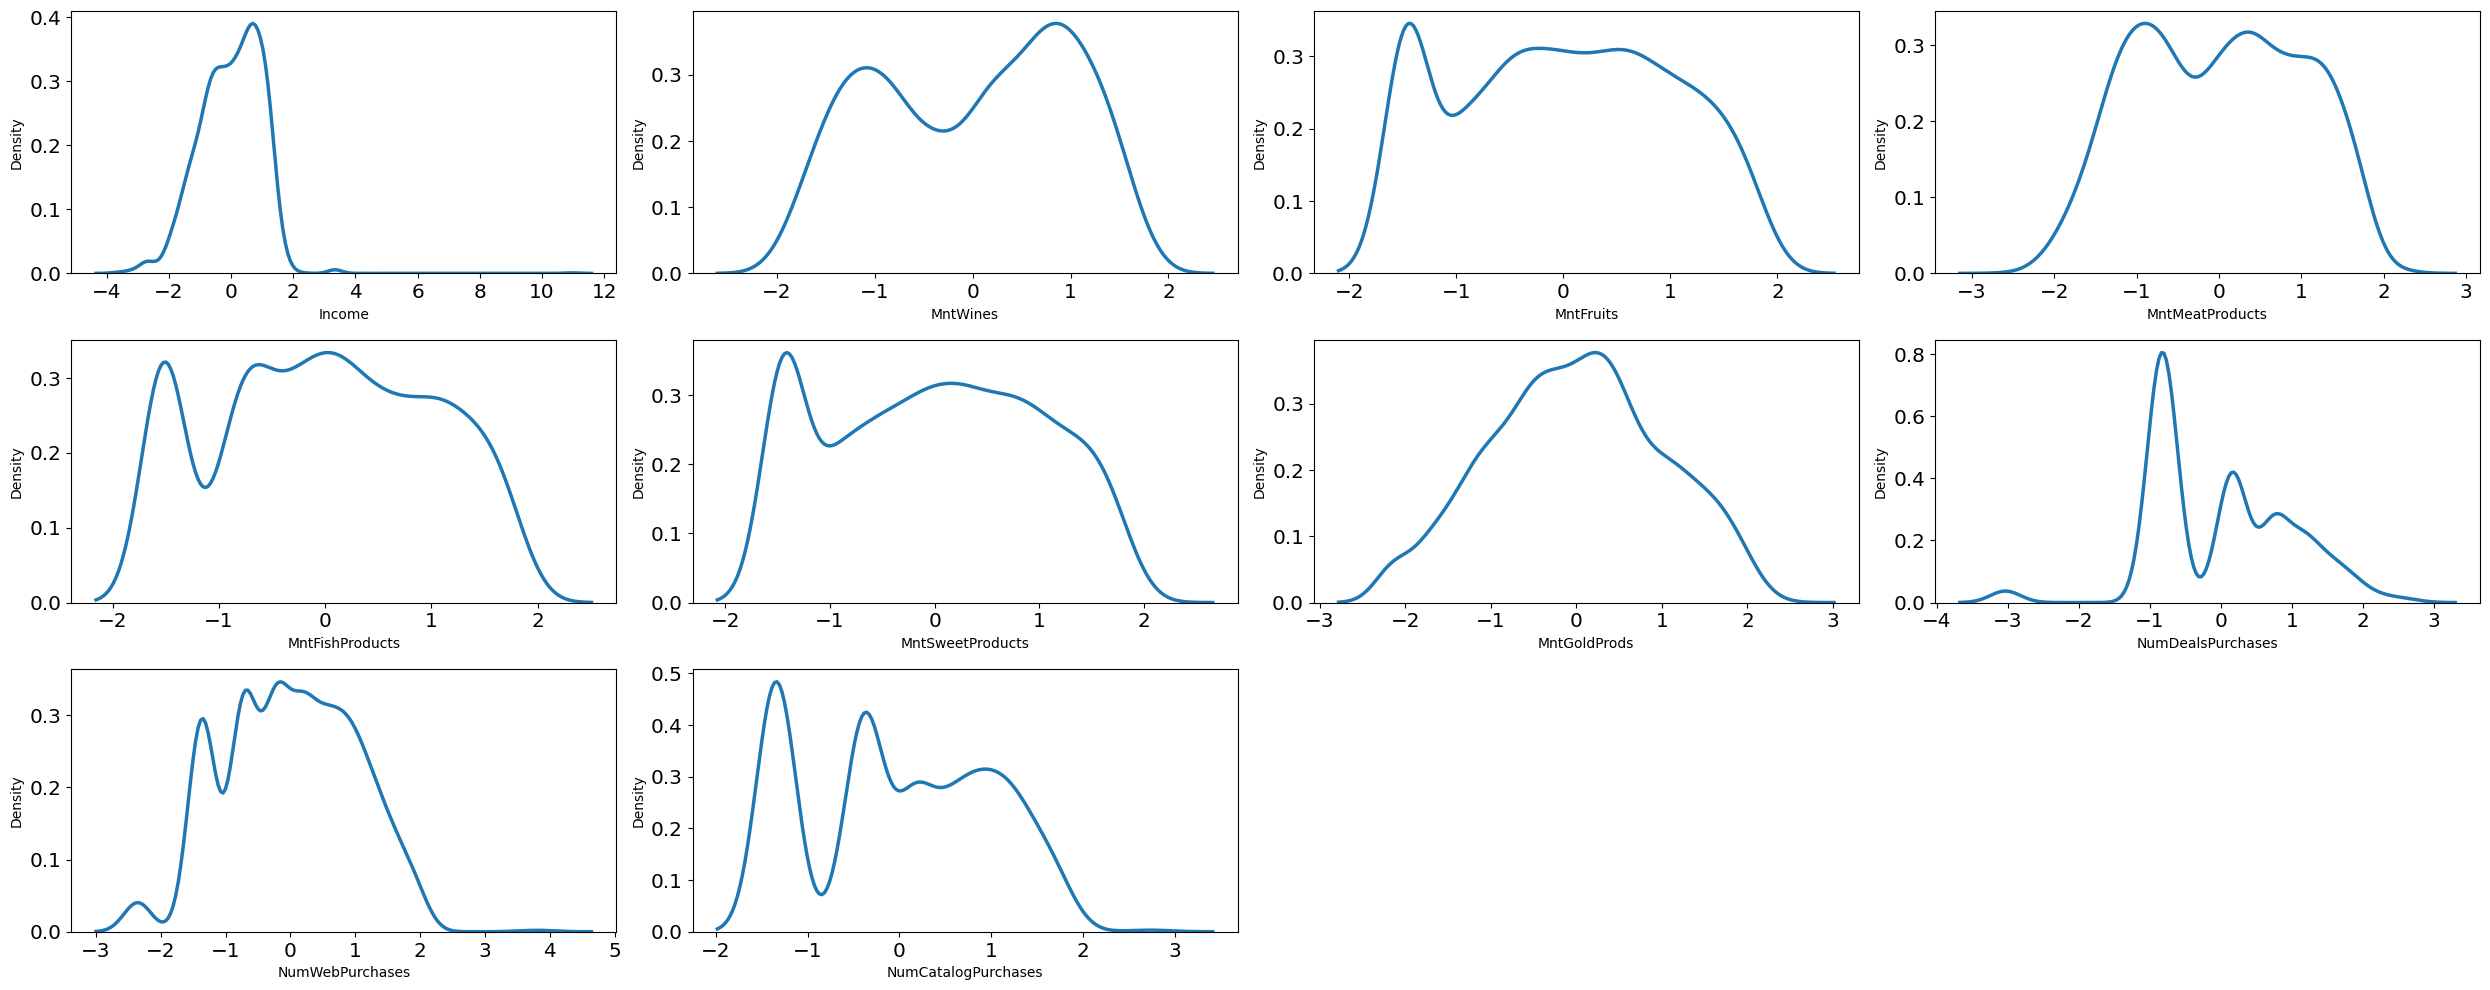

In [ ]:
plt.figure(figsize=(25, 10))

for i in range(0, len(log)):
  plt.subplot(3, 4, i+1)
  sns.kdeplot(df_log[log[i]])
  plt.tight_layout()

In [ ]:
for i in range(0, len(log)):
  skew = df[log[i]].skew(axis = 0, skipna = True)
  print(f'{log[i]}: {skew}')

Income: 0.22699764959433996
MntWines: -0.1480922845301341
MntFruits: 0.017998159066765402
MntMeatProducts: -0.01826741937645039
MntFishProducts: -0.011371185999283868
MntSweetProducts: 0.019469034400947823
MntGoldProds: -0.031229755683501722
NumDealsPurchases: 0.0008994549449180296
NumWebPurchases: -0.01969307884161518
NumCatalogPurchases: 0.029642199000975138


## Split Data

In [ ]:
X = df[['Age', 'Education', 'Status_Divorced', 'Status_Married',
       'Status_Others', 'Status_Single', 'Status_Widow', 'Income',
       'Dependents', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']]
y = df[['Response']]

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("X_train dataset: ", X_train.shape)  
print("y_train dataset: ", y_train.shape)  
print("X_test dataset: ", X_test.shape)  
print("y_test dataset: ", y_test.shape) 

X_train dataset:  (1551, 26)
y_train dataset:  (1551, 1)
X_test dataset:  (665, 26)
y_test dataset:  (665, 1)


Data train sebanyak 1551 baris dan data test sebanyak 665 baris.

## Handling Class Imbalance

In [ ]:
y_train['Response'].value_counts()

0    1318
1     233
Name: Response, dtype: int64

In [ ]:
(233/len(y_train))*100

15.022566086395875

Dataset masih tidak seimbang dikarenakan hanya 15.02% data yang mewakilkan customer merespon campaign.

### Random Oversampling

In [ ]:
X_over_ro, y_over_ro = over_sampling.RandomOverSampler(random_state=43).fit_resample(X_train, y_train)

In [ ]:
y_over_ro['Response'].value_counts()

0    1318
1    1318
Name: Response, dtype: int64

# Stage 3 (Modelling)

Modelling dilakukan dengan mencoba 5 algorithma, diantaranya:
- Logistic Regression
- Decision Tree
- Random Forest 
- XGBoost 
- AdaBoost 

Evaluation model menggunakan ROC AUC score karena data imbalance dan berfokus pada label positif dan negatif.

### Declaring Function

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from xgboost import XGBClassifier 

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, roc_curve, make_scorer, log_loss, balanced_accuracy_score

def eval_clf_ro(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_ro)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_ro)
    
    cls_report_ro_train = classification_report(y_over_ro, y_pred_train)
    print(f"Classification Report (Train) : \n {cls_report_ro_train}")
    cls_report_ro_test = classification_report(y_test, y_pred)
    print(f"Classification Report (Test) : \n {cls_report_ro_test}")
    
    
    acc_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_train = roc_auc_score(y_over_ro, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
    
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

def get_metrics(y_pred, y_act, model_name):
    recall =  recall_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred)
    roc_auc = roc_auc_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred)
    accuracy = balanced_accuracy_score(y_act, y_pred)

    metrics_result = dict(model_name=model_name, 
                        recall=recall, 
                        precision=precision, 
                        roc_auc=roc_auc, 
                        f1=f1,
                        accuracy=accuracy)
    return metrics_result

def prediction(X_train, y_train, X_test, y_test, clf, model_name='decision tree'):
  
    clf = clf
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)


    result = dict()
    test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, model_name=model_name)
    train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, model_name=model_name)

    result['test'] = test_result
    result['train'] = train_result
    result['y_test'] = y_test
    result['y_test_pred'] = y_test_pred
    result['y_train'] = y_train
    result['y_train_pred'] = y_train_pred
    result['clf'] = clf
    result['x_train'] = X_train
    result['x_test'] = X_test

    del clf

    return result

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

### Model Fitting

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'XGB Classifier', 'AdaBoost Classifier']
algorithms = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, AdaBoostClassifier]

# Result List
acc_test_ro = []
precision_test_ro = []
recall_test_ro = []
f1_test_ro = []
roc_auc_train_ro = []
roc_auc_test_ro = []
roc_auc_crossval_train_ro = []
roc_auc_crossval_test_ro = []

In [ ]:
# Model Evaluation using Random Oversampling Data
i = 0

for model_type in algorithms:
    # Fitting and using the algorithms
    model = model_type()
    model.fit(X_over_ro, y_over_ro)
    print(models[i])
    result = eval_clf_ro(model)
    
    # Adding the results to the list
    acc_test_ro.append(result['Test Accuracy'])
    precision_test_ro.append(result['Test Precision'])
    recall_test_ro.append(result['Test Recall'])
    f1_test_ro.append(result['Test F1'])
    roc_auc_train_ro.append(result['Train ROC AUC'])
    roc_auc_test_ro.append(result['Test ROC AUC'])
    roc_auc_crossval_train_ro.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test_ro.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1318
           1       0.82      0.81      0.81      1318

    accuracy                           0.81      2636
   macro avg       0.81      0.81      0.81      2636
weighted avg       0.81      0.81      0.81      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       565
           1       0.48      0.84      0.61       100

    accuracy                           0.84       665
   macro avg       0.72      0.84      0.75       665
weighted avg       0.89      0.84      0.86       665

Decision Tree
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00    

### Fitting Result

In [ ]:
ro_df = pd.DataFrame(list(zip(models, acc_test_ro, precision_test_ro, recall_test_ro, f1_test_ro, roc_auc_train_ro, 
                              roc_auc_test_ro, roc_auc_crossval_train_ro, roc_auc_crossval_test_ro)), 
                     columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Train ROC AUC', 
                              'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])
ro_df

,Model,Test Accuracy,Test Precision,Test Recall,Test F1,Train ROC AUC,Test ROC AUC,Crossval Train ROC AUC,Crossval Test ROC AUC
0,Logistic Regression,0.839098,0.480000,0.84,0.610909,0.893561,0.913230,0.8921,0.8800
1,Decision Tree,0.827068,0.424242,0.42,0.422111,0.999974,0.659929,0.9998,0.7055
2,Random Forest Classifier,0.879699,0.685185,0.37,0.480519,0.999967,0.881646,0.9998,0.8723
3,XGB Classifier,0.866165,0.563218,0.49,0.524064,0.999974,0.861372,0.9998,0.8848
4,AdaBoost Classifier,0.827068,0.453988,0.74,0.562738,0.938959,0.884735,0.9327,0.8800


Hasil modelling menunjukkan bahwa model Random Forest adalah yang paling cocok untuk dataset ini karena data bersifat non-linear dan gap antara train dan test dari ROC AUC scorenya paling kecil diantara model yang lain. Kemudian, karena ROC AUC score-nya masih terindikasi overfitting maka akan dilakukan hyperparameter tuning pada model Random Forest.

### Random Forest 

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_ro, y_over_ro)
eval_clf_ro(rf)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       565
           1       0.65      0.39      0.49       100

    accuracy                           0.88       665
   macro avg       0.77      0.68      0.71       665
weighted avg       0.86      0.88      0.86       665



{'Test Accuracy': 0.8766917293233083,
 'Test Precision': 0.65,
 'Test Recall': 0.39,
 'Test F1': 0.4875,
 'Train ROC AUC': 0.9999671871438078,
 'Test ROC AUC': 0.8825221238938052,
 'Crossval Train ROC AUC': 0.9998,
 'Crossval Test ROC AUC': 0.8778}

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 20)], # Jumlah subtree 
                       bootstrap = [True, False], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1] # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Predict & Evaluation
rf_hyper = prediction(X_over_ro, y_over_ro, X_test, y_test, rf_tuned, model_name='random forest_hyperparam')


In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 158
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


In [ ]:
from numpy.ma.core import log2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics

rf2 = RandomForestClassifier(n_estimators = 158, 
                              bootstrap = True, 
                              criterion = 'gini',
                              max_depth = 110,  
                              min_samples_split = 4, 
                              min_samples_leaf = 1, 
                              max_features = 'log2', 
                              n_jobs = -1,
                              random_state = 42)
rf2.fit(X_over_ro, y_over_ro)
eval_clf_ro(rf2)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       565
           1       0.68      0.41      0.51       100

    accuracy                           0.88       665
   macro avg       0.79      0.69      0.72       665
weighted avg       0.87      0.88      0.87       665



{'Test Accuracy': 0.8827067669172932,
 'Test Precision': 0.6833333333333333,
 'Test Recall': 0.41,
 'Test F1': 0.5125000000000001,
 'Train ROC AUC': 0.9999441605780589,
 'Test ROC AUC': 0.8772212389380531,
 'Crossval Train ROC AUC': 0.9997,
 'Crossval Test ROC AUC': 0.8801}

Hasil ROC AUC score setelah dilakukan hyperparameter tuning ternyata masih memiliki gap antara data test dan train (> 0,1) yang menunjukkan masih overfitting. Oleh karena itu, akan dilakukan hyperparameter tuning dengan menganalisis learning curve untuk mendapatkan hasil terbaik.

#### Learning Curve

param value: 1; train: 0.9852566656151202; test: 0.8916548672566372
param value: 2; train: 0.9854535427522733; test: 0.8946283185840709
param value: 3; train: 0.9844259822557285; test: 0.8944159292035397
param value: 5; train: 0.9830489936239439; test: 0.8935132743362831
param value: 6; train: 0.9827490726050645; test: 0.8966283185840709
param value: 7; train: 0.9809098256658708; test: 0.8945752212389381
param value: 9; train: 0.9787056076595569; test: 0.8937256637168142
param value: 10; train: 0.9773965473967317; test: 0.8936017699115044
param value: 11; train: 0.9755918403061613; test: 0.8949823008849558
param value: 13; train: 0.971072301113795; test: 0.8922035398230088
param value: 14; train: 0.9706054374932359; test: 0.894787610619469
param value: 15; train: 0.9688490861907383; test: 0.8940619469026548
param value: 17; train: 0.9657019303170068; test: 0.893424778761062
param value: 18; train: 0.9638546240798009; test: 0.889637168141593
param value: 20; train: 0.9624603655237047; t

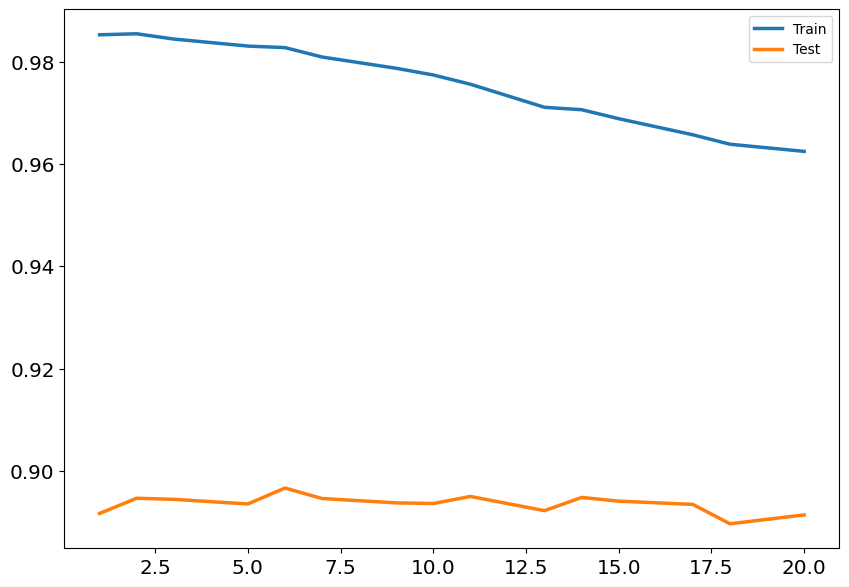

In [ ]:
# Learning curve
# param_values = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 110, num = 50)] # max_depth
# param_values = [int(x) for x in np.linspace(start = 2, stop = 20, num = 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(start = 1, stop = 20, num = 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
  model = RandomForestClassifier(n_estimators = 560, max_depth = 7, min_samples_split = 17, min_samples_leaf = c) 

  model.fit(X_over_ro, y_over_ro)

  # eval on train
  y_pred_train_proba = model.predict_proba(X_over_ro)
  train_auc = roc_auc_score(y_over_ro, y_pred_train_proba[:,1])
  train_scores.append(train_auc)

  # eval on test
  y_pred_proba = model.predict_proba(X_test)
  test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
  test_scores.append(test_auc)

  print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

In [ ]:
rfc = RandomForestClassifier(n_estimators = 560, 
                       bootstrap = True, 
                       criterion = 'gini',
                       max_depth = 7,  
                       min_samples_split = 17, 
                       min_samples_leaf = 15, 
                       max_features = 'log2', 
                       n_jobs = -1,
                       random_state = 42)
rfc.fit(X_over_ro, y_over_ro)
eval_clf_ro(rfc)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1318
           1       0.90      0.90      0.90      1318

    accuracy                           0.90      2636
   macro avg       0.90      0.90      0.90      2636
weighted avg       0.90      0.90      0.90      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       565
           1       0.50      0.70      0.59       100

    accuracy                           0.85       665
   macro avg       0.72      0.79      0.75       665
weighted avg       0.88      0.85      0.86       665



{'Test Accuracy': 0.8511278195488722,
 'Test Precision': 0.5035971223021583,
 'Test Recall': 0.7,
 'Test F1': 0.5857740585774058,
 'Train ROC AUC': 0.9684294270299644,
 'Test ROC AUC': 0.8929469026548671,
 'Crossval Train ROC AUC': 0.9301,
 'Crossval Test ROC AUC': 0.8703}

Hasil ROC AUC score menunjukkan sudah tidak ada gap yang besar (< 0,1) yang menunjukkan tidak ada overfitting atau underfitting. 

#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

rfc_pred = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_over_ro)

rfc_cm = confusion_matrix(y_test, rfc_pred)
print(rfc_cm)

[[496  69]
 [ 30  70]]


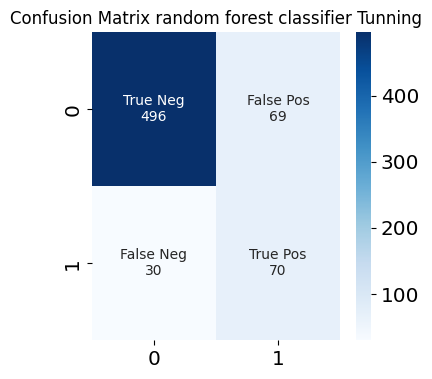

In [ ]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                rfc_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(4,4))
sns.heatmap(rfc_cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix random forest classifier Tunning')
# plt.savefig('Confusion Matrix random forest classifier.png')
plt.show()

- True Negative: ketika perusahaan mengira customer akan menolak kampanye.
- False Negative: ketika perusahaan mengira customer akan menolak kampanye padahal kenyataannya customer akan menerimanya.
- True Positive: ketika perusahaan mengira customer akan menerima kampanye tersebut.
- False Positive: ketika perusahaan mengira customer akan menerima kampanye padahal kenyataannya customer akan menolaknya.

## Feature Importance

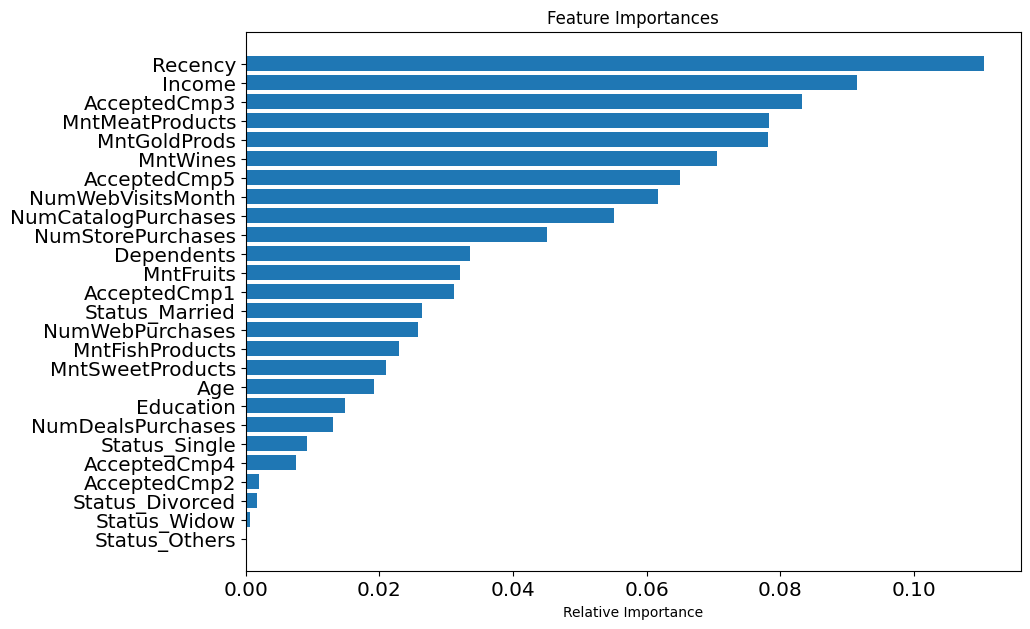

In [ ]:
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 33.3 MB/s eta 0:00:00


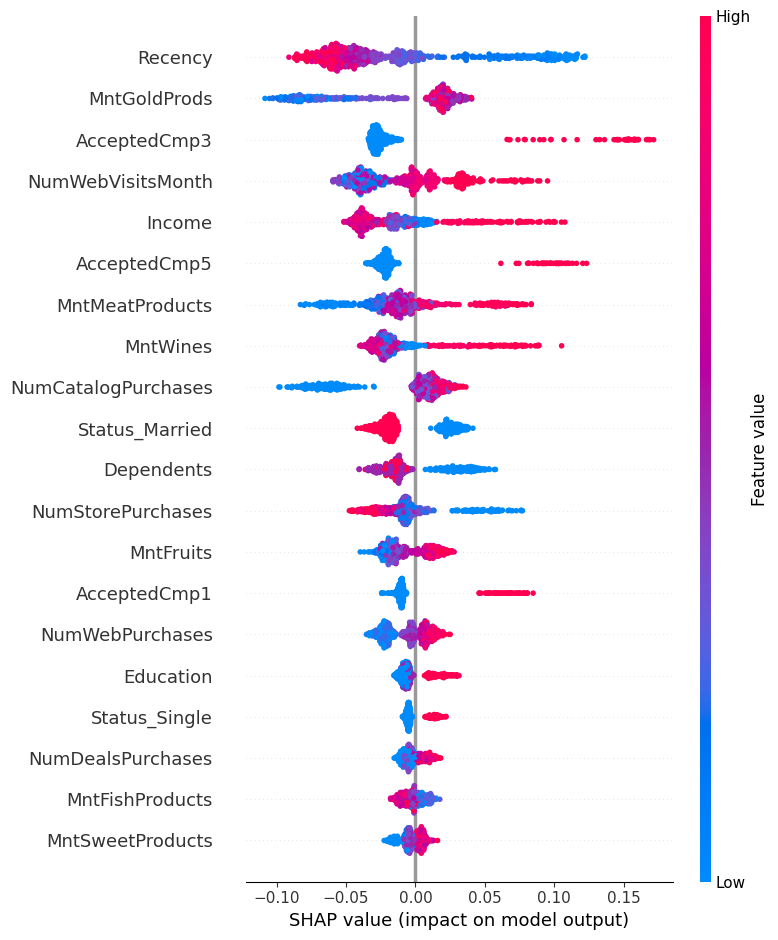

In [ ]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

# Business Recommendation

Fitur yang paling mempengaruhi customer merespon campaign terakhir adalah:
- Recency rendah: customer yang baru-baru ini melakukan pembelian
- MntGoldProducts tinggi: customer yang membeli produk emas dalam jumlah yang besar
- NumWebVisitsMonth tinggi: customer yang sering mengunjungi website perusahaan, dimana customer dapat melakukan pembelian melalui website perusahaan

Rekomendasi:
- Menargetkan campaign kepada customer yang baru-baru ini melakukan pembelian
- Menargetkan campaign kepada customer yang banyak melakukan pembelian produk emas atau melakukan campaign yang berhubungan dengan produk emas
- Melakukan campaign melalui website perusahaan



## Model Based - Simulation

Dengan menggunakan model ML yang telah dibuat kita dapat membuat simulasi sebagai berikut:

Dengan asumsi:
* Cost marketing campaign: 3 dollar per customer
* Revenue jika customer menerima campaign: 11 dollar per customer

Sebelumnya, perusahaan melakukan campaign
kepada 2240 orang dengan 334 orang diantaranya
menerima campaign, sehingga:
- Loss dari campaign: (334 x 11) - (2240 x 3) = -3046 dollar
- Response rate: 334/2240 = 14.9%

Setelah menggunakan machine learning:

Perusahaan melakukan campaign terhadap 139 orang (FP + TP) dengan 70 (TP) diantaranya menanggapi campaign,
sehingga:
- Profit dari campaign: (70 x 11) - (139 x 3) = 353 dollar
- Response rate: 70/139 = 50.4%

Kesimpulannya, ML dapat bekerja dengan baik bahkan bisa mengantisipasi potential loss menjadi potential revenue.
